# Algerian Forest Fire: EDA

# Dataset Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria:
1.  Bejaia region located in the northeast of Algeria 
2.  Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.

The dataset includes 11 attribues and 1 output attribue (class).

The 244 instances have been classified into "fire" (138 classes) and "not fire" (106 classes) classes.

# Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
    
Weather data observations:

2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42

3. RH : Relative Humidity in %: 21 to 90

4. Ws :Wind speed in km/h: 6 to 29

5. Rain: total day in mm: 0 to 16.8
        
Fire Weather Index (FWI) Components:

6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5

7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9

8. Drought Code (DC) index from the FWI system: 7 to 220.4

9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5

10. Buildup Index (BUI) index from the FWI system: 1.1 to 68

11. Fire Weather Index (FWI) Index: 0 to 31.1

12. Classes: two classes, namely "Fire" and "not Fire"


Importing Python packages

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix
%matplotlib inline

Import Data as DataFrame from Algerian_forest_fires_dataset_UPDATE.csv using pandas

In [2]:
df=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv')

Check the dataframe df

In [3]:
df

,,,,,,,,,,,,,Bejaia Region Dataset
day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


Header:Bejaia Region Dataset, needs deletion so that the number of columns can be corrected

In [4]:
df=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [5]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [6]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


In [7]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

Column names has extra spaces, hence rewriting to df.columns using str.strip()

In [8]:
df.columns=df.columns.str.strip()

In [9]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [10]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
RH             1
Ws             1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

All columns have 1 null value except classes. Hence will need further investigation

Finding out which rows have NaN values in:
Rows# 122 and 167 has NaN values in

In [11]:
df[df.isna().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [12]:
df[df['FWI'].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df[167:168]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


Row 167: seems like the data is slipped into DC (has 14.6 9) leaving classes empty.
so we split DC and add it into ISI and move ISI to Classes by 1 column

In [14]:
df['DC'][167].split(" ")

['14.6', '9']

In [15]:
x=df['DC'][167].split(" ")

In [16]:
x

['14.6', '9']

In [17]:
df['Classes'][167]=df['FWI'][167]
df['FWI'][167]=df['BUI'][167]
df['BUI'][167]=df['ISI'][167]
df['ISI'][167]=x[1]
df['DC'][167]=x[0]

In [18]:
df[167:168]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6,9,12.5,10.4,fire


In [19]:
df[120:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


Dataset change by region from 123. Will split the dataset by adding new column  "region".

In [20]:
df.loc[:122,'Region']=1
df.loc[122:,'Region']=2
df['Region']=df['Region'].astype(int)

In [21]:
df[120:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,1
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,1
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,2
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2


In [22]:
df.drop(index=122,axis=0,inplace=True)

In [23]:
df.drop(index=123, axis=0,inplace=True)

In [24]:
df[120:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,1
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,1
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,2
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,2


In [25]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
 14  Region       244 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 29.5+ KB


All dtype are as object will convert #1 to 5 as int and #6 to 12 as float

In [27]:
df[['day','month','year','Temperature','RH','Ws']]=df[['day','month','year','Temperature','RH','Ws']].astype(int)

In [28]:
df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']]=df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']].astype(float)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    int32  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
 14  Region       244 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 23.8+ KB


In [30]:
df['Classes'].nunique()

8

In [31]:
df['Classes']

0       not fire   
1       not fire   
2       not fire   
3       not fire   
4       not fire   
           ...     
241         fire   
242     not fire   
243     not fire   
244     not fire   
245    not fire    
Name: Classes, Length: 244, dtype: object

In [32]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [33]:
df.Classes=df.Classes.str.strip()    

In [34]:
df.Classes

0      not fire
1      not fire
2      not fire
3      not fire
4      not fire
         ...   
241        fire
242    not fire
243    not fire
244    not fire
245    not fire
Name: Classes, Length: 244, dtype: object

In [35]:
df.Classes.unique()

array(['not fire', 'fire'], dtype=object)

In [36]:
df['Classes'].str.strip()

0      not fire
1      not fire
2      not fire
3      not fire
4      not fire
         ...   
241        fire
242    not fire
243    not fire
244    not fire
245    not fire
Name: Classes, Length: 244, dtype: object

In [37]:
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [38]:
df['Classes'].value_counts()

fire        138
not fire    106
Name: Classes, dtype: int64

In [39]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [40]:
df.to_csv('Algerian_forest_fires_dataset_UPDATE_Cleaned.csv')

# EDA

Distribution Visualisation

In [41]:
df1=df.drop(['day','month','year'],axis=1) #dropping day,month and year for now

In [42]:
df1['Classes']=np.where(df1['Classes']=='fire',1,0)

array([[<AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'Ws'}>],
       [<AxesSubplot:title={'center':'Rain'}>,
        <AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>],
       [<AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>,
        <AxesSubplot:title={'center':'BUI'}>],
       [<AxesSubplot:title={'center':'FWI'}>,
        <AxesSubplot:title={'center':'Classes'}>,
        <AxesSubplot:title={'center':'Region'}>]], dtype=object)

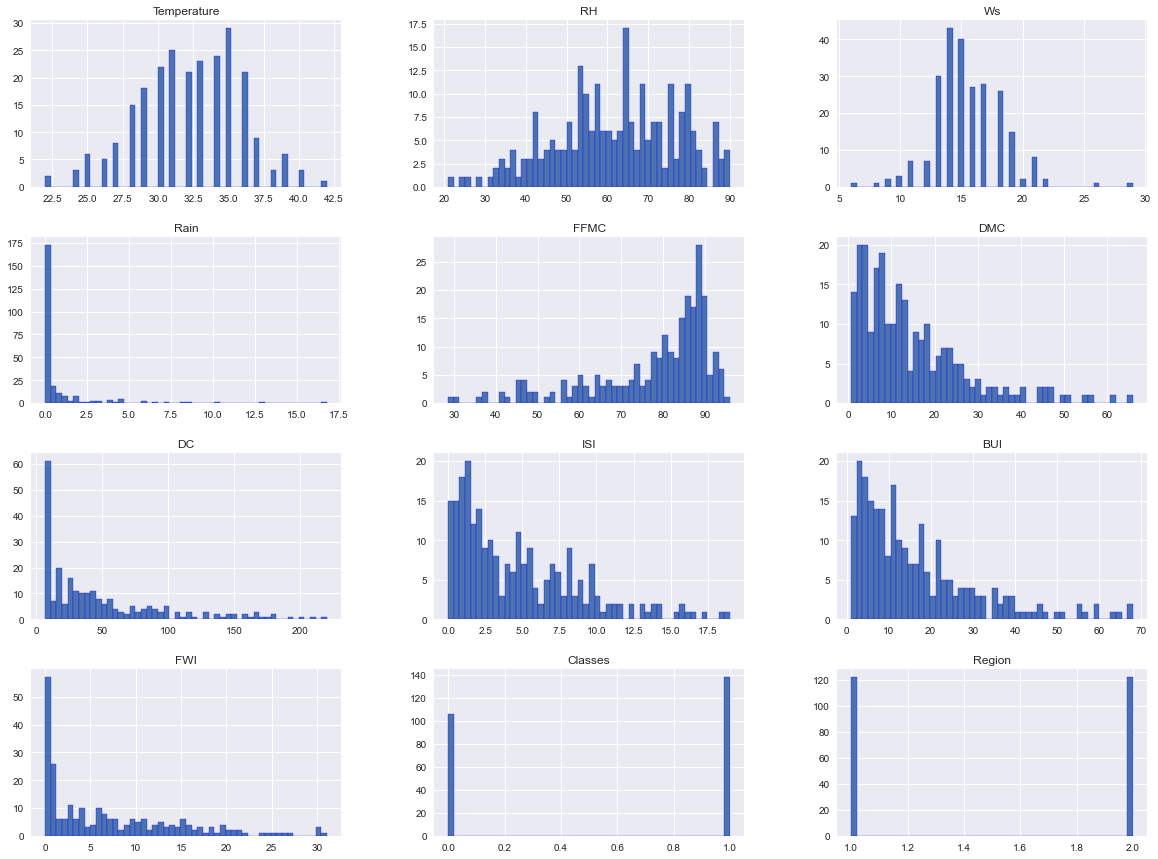

In [43]:
#df.hist(bins=50,figsize=(20,15))
plt.style.use('seaborn')
df1.hist(bins=50,figsize=(20,15),ec='b')

In [44]:
#percentage of classes
per=df['Classes'].value_counts(normalize=True)*100
per

fire        56.557377
not fire    43.442623
Name: Classes, dtype: float64

Text(0.5, 1.0, 'Classified as Fire or No Fire')

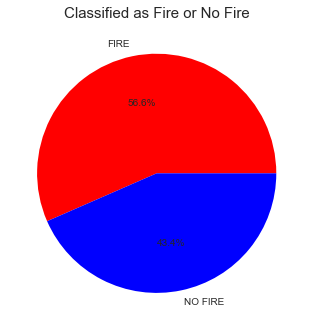

In [45]:
#piechatplot
plt.pie(per,labels=['FIRE','NO FIRE'],autopct='%1.1f%%',colors=["red","blue"])
plt.title("Classified as Fire or No Fire", fontsize=15,)

<AxesSubplot:xlabel='month', ylabel='count'>

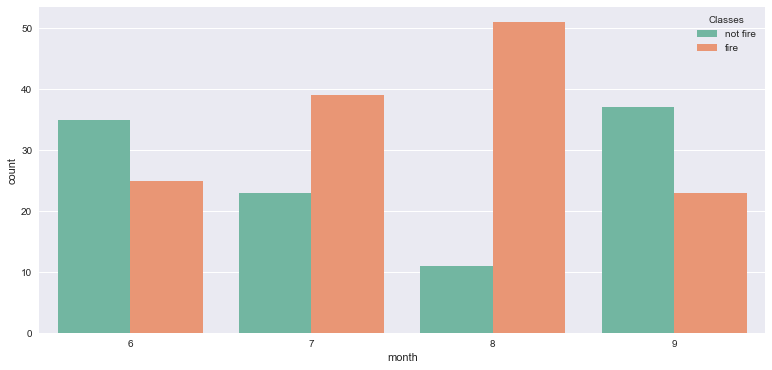

In [46]:
plt.subplots(figsize=(13,6))
sns.countplot(x='month',hue='Classes',data=df,palette='Set2')
#plt.xticks(np.arange(4),['June','July','Aug','Sep'])

In [47]:
df.groupby(df['month']).value_counts()

month  day  year  Temperature  RH  Ws  Rain  FFMC  DMC   DC    ISI  BUI   FWI   Classes   Region
6      1    2012  29           57  18  0.0   65.7  3.4   7.6   1.3  3.4   0.5   not fire  1         1
                  32           71  12  0.7   57.1  2.5   8.2   0.6  2.8   0.2   not fire  2         1
       17   2012  30           89  16  0.6   37.3  1.1   7.8   0.0  1.6   0.0   not fire  1         1
                  31           69  17  4.7   62.2  3.9   8.0   1.1  3.8   0.4   not fire  2         1
       18   2012  31           78  14  0.3   56.9  1.9   8.0   0.7  2.4   0.2   not fire  1         1
                                                                                                   ..
9      13   2012  25           86  21  4.6   40.9  1.3   7.5   0.1  1.8   0.0   not fire  1         1
                  29           49  19  0.0   88.6  11.5  33.4  9.1  12.4  10.3  fire      2         1
       14   2012  22           76  26  8.3   47.4  1.1   7.0   0.4  1.6   0.1   not fir

In [48]:
df1

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
241,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,2
242,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,2
243,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,2
244,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,2


Univariate Analysis

In [49]:
df['Classes']=df1['Classes']

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    int32  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    int32  
 14  Region       244 non-null    int32  
dtypes: float64(7), int32(8)
memory usage: 22.9 KB


C:\Users\shara\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


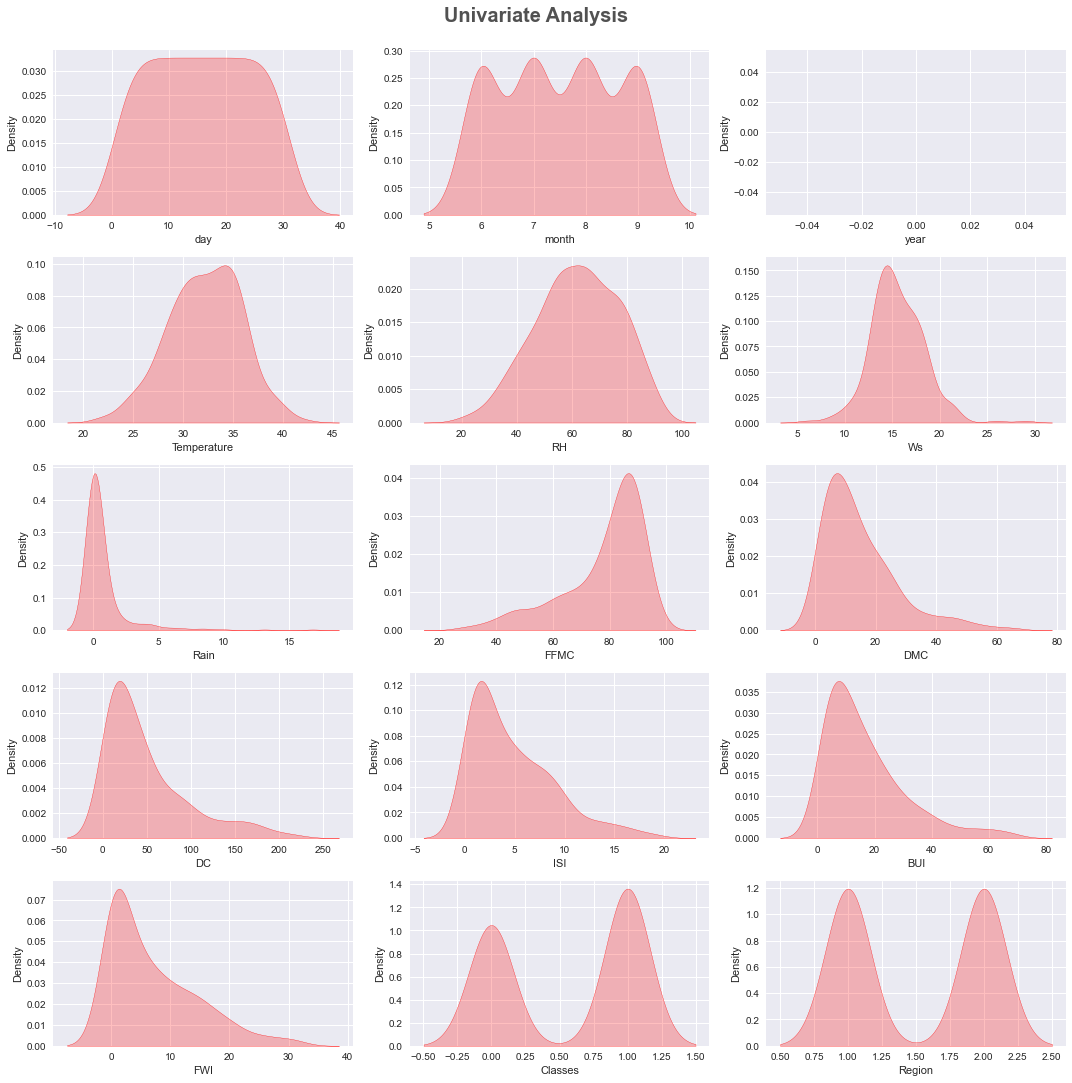

In [51]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis',fontsize=20,fontweight='bold',alpha=0.8,y=1)

for i in range(0,len(df.columns)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df[df.columns[i]],shade=True, color='r')
    plt.xlabel(df.columns[i])
    plt.tight_layout()

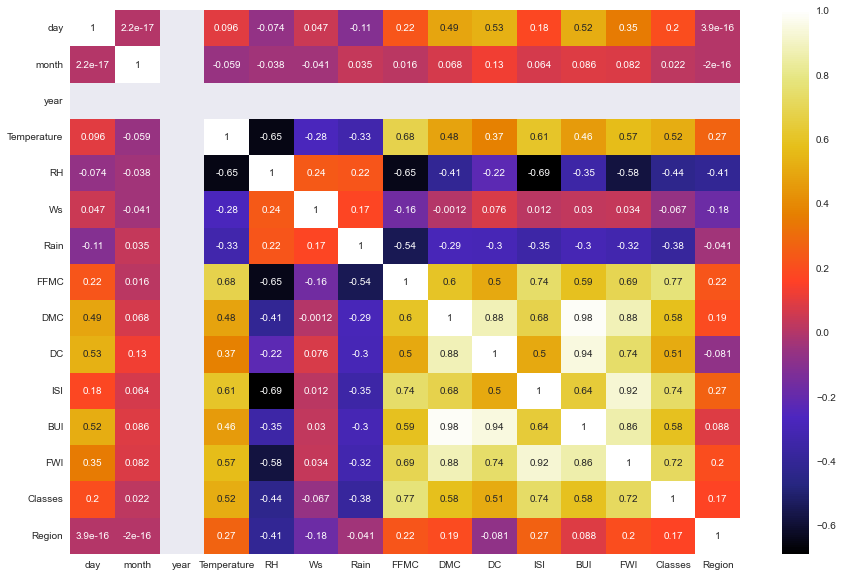

In [52]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap="CMRmap",annot=True)
plt.show()

In [53]:
#sns.pairplot(df)

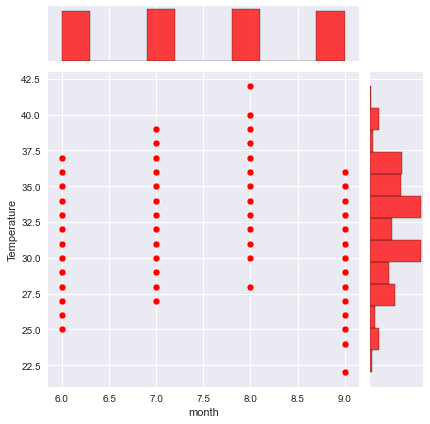

In [54]:
sns.jointplot(x='month',y='Temperature',data=df,color='r')

<AxesSubplot:xlabel='day', ylabel='Temperature'>

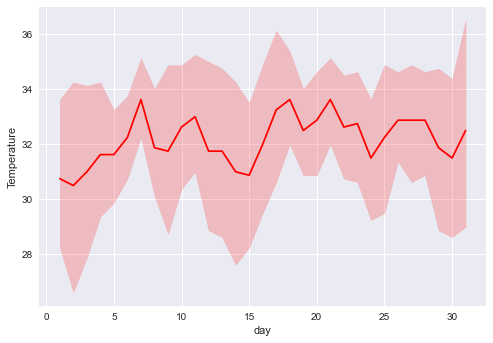

In [55]:
#lineplot
sns.lineplot(x='day',y='Temperature',data=df,color='r')

Text(0, 0.5, 'Temperature')

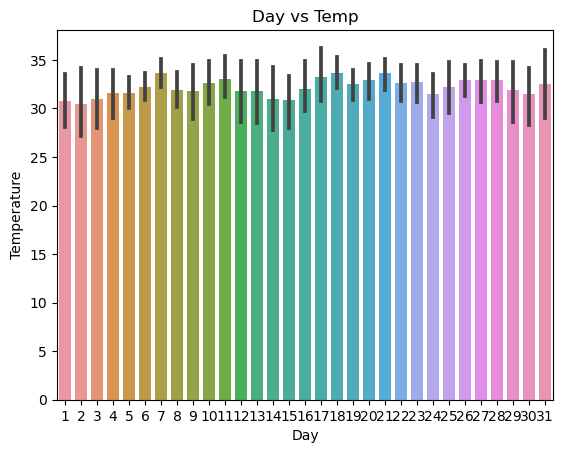

In [56]:
#barplot
plt.style.use('default')
sns.barplot(x='day',y='Temperature',data=df)
plt.title('Day vs Temp',fontsize=12)
plt.xlabel('Day')
plt.ylabel('Temperature')

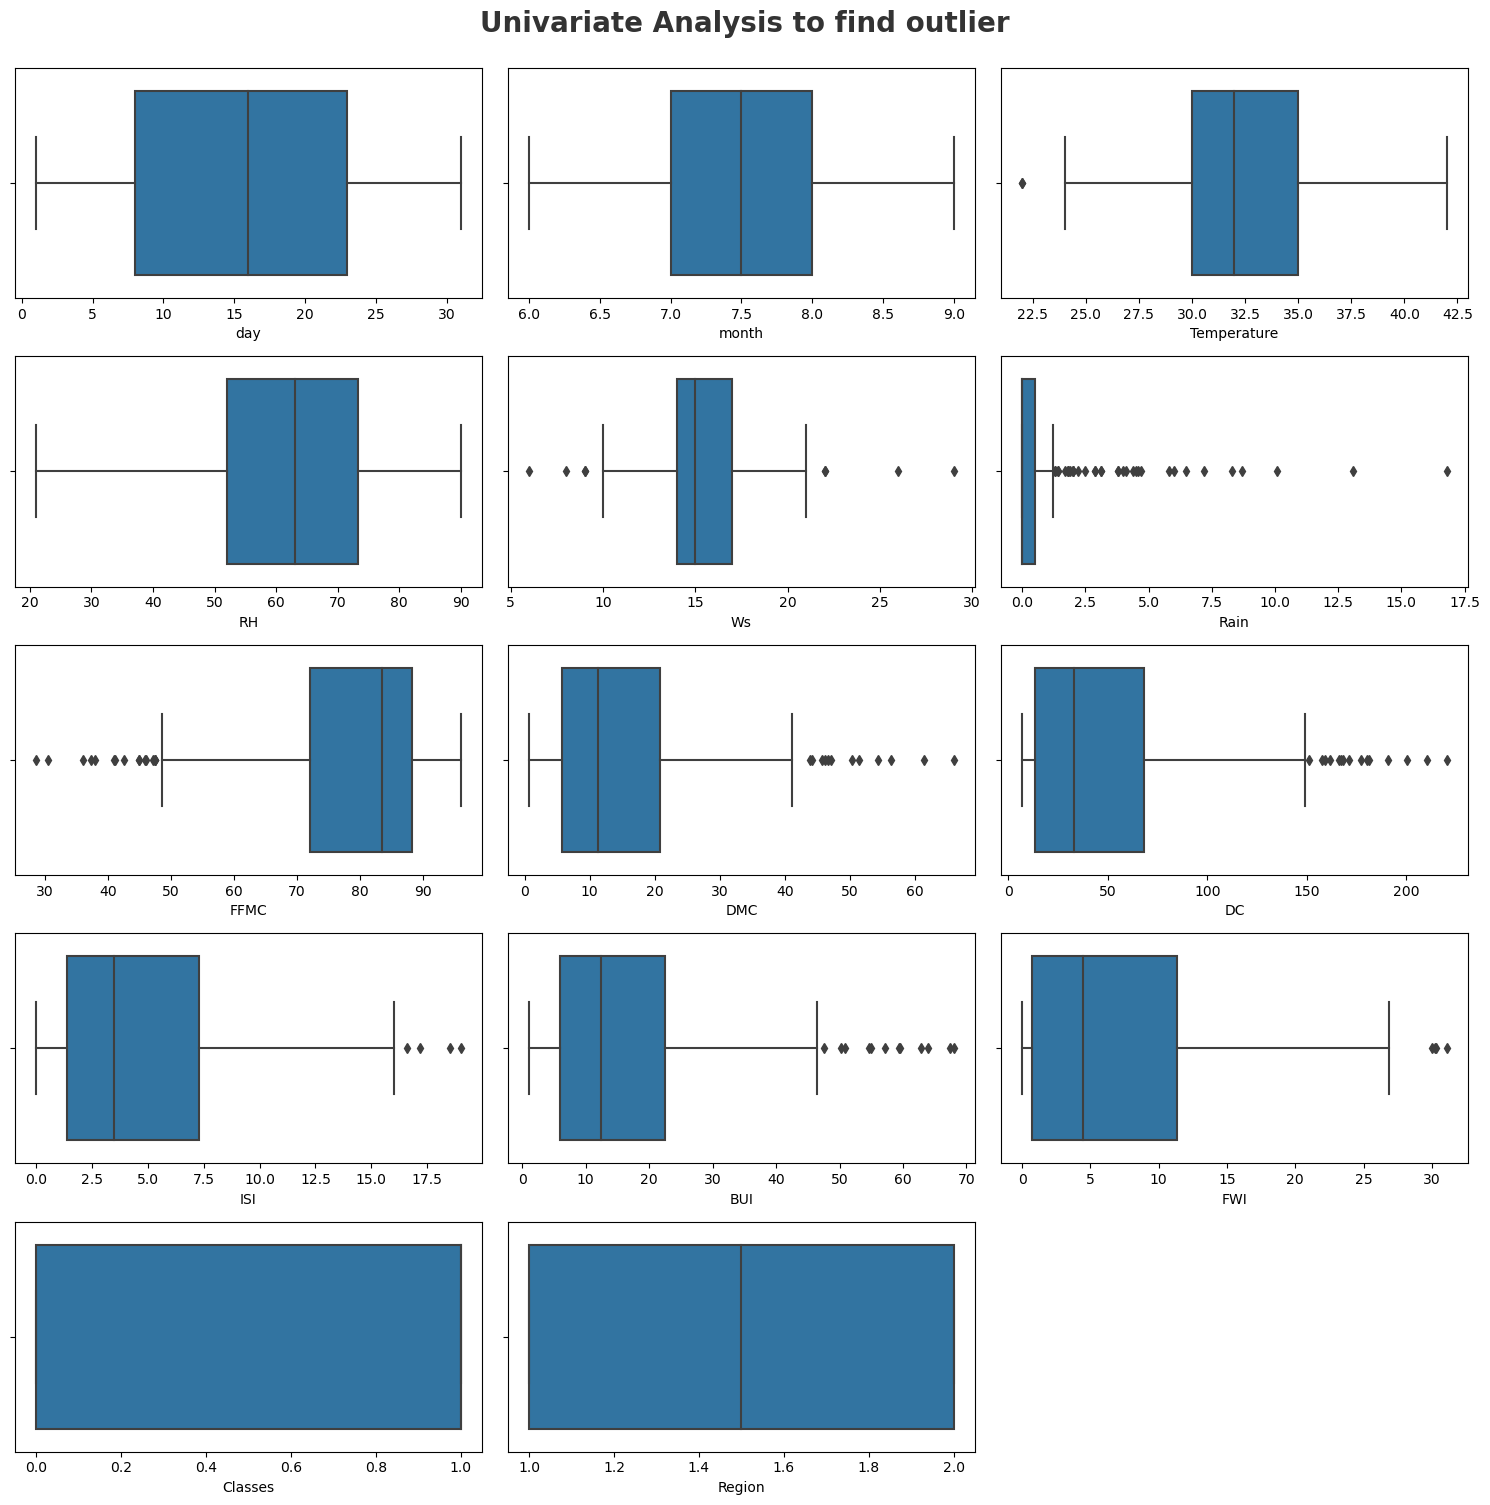

In [64]:
#Outlier
df=df.drop('year',axis=1) ##dropping the year column
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis to find outlier', fontsize=20,fontweight='bold',alpha=0.8,y=1)

for i in range(0,len(df.columns)):
    plt.subplot(5,3,i+1)
    sns.boxplot(x=df[df.columns[i]])
    plt.xlabel(df.columns[i])
    plt.tight_layout()

<AxesSubplot:>

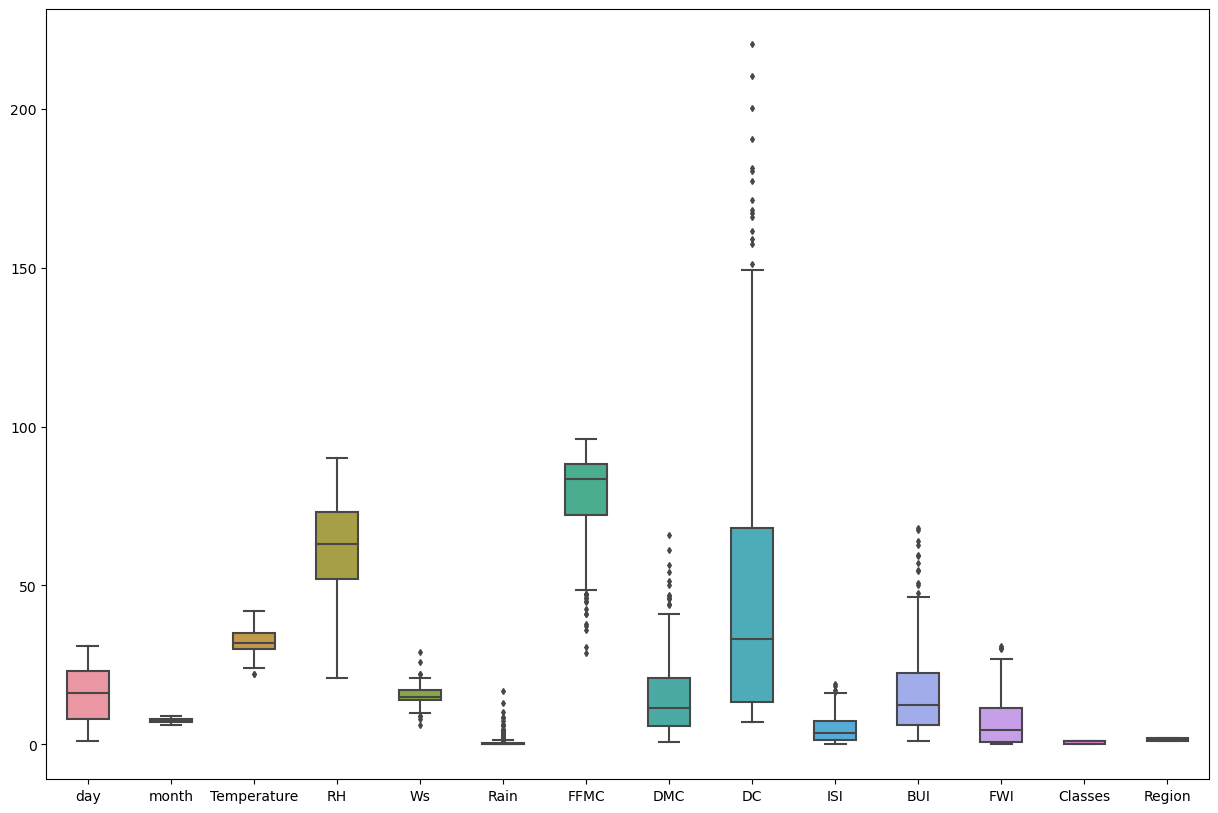

In [ ]:
print(f"Highest Temp Recorder: {df.Temperature.max()}")
print(f"Lowest Temp Recorder: {df.Temperature.min()}")

In [ ]:
df.head()

In [ ]:
df.sort_values(by='Temperature',ascending=False)[['Temperature','day','month','Rain','Classes','Region']].head(5)

In [ ]:
df.sort_values(by='Temperature',ascending=False)[['Temperature','Region']].head(5)

# Analysis on which Region has most Forest Fire and why?

# Finding out which region has max temp recorded

In [ ]:
Max_T=df.groupby('Region').apply(lambda x: x['Temperature'].max()).reset_index(name='Max Temp')
Max_T 


In [ ]:
Max_T=df.groupby(['month','Region']).apply(lambda x: x['Temperature'].max()).reset_index(name='Max Temp')

#Max_T=df.groupby(['month','Region'])
Max_T 


# MY DOUBT !!!! to wmadha@ineuron.ai, 

In [ ]:
T=df.groupby(['month','Region']).apply(lambda x: x['Temperature'].max()).reset_index(name='Max Temp')

T 


In [ ]:
T[T['Region']==1]

In [ ]:
T[T['Region']==2]

In [ ]:
test1=df.groupby(['Region','month']).apply(lambda x: x['Temperature'].max()).reset_index(name='Max Temp')

test1 

In [ ]:
df.head()

In [ ]:
Max_T_mon=df.groupby('month').value_counts()
#.reset_index(name='Max Temp')
Max_T_mon

#df.groupby('Region').apply(lambda x: x[x['Classes']==1]['Classes'].sum()).reset_index(name='Occurances')

In [ ]:
Max_T_mon=df.groupby('month').apply(lambda x:x[x['Region']==0]['Region'].sum() and x['Temperature'].max())
#.reset_index(name='Max Temp')
Max_T_mon

In [ ]:
Max_T=df.groupby('Region').apply(lambda x: x['Temperature'].max()).reset_index(name='Max Temp')
Max_T 

In [ ]:
Max_T=df.groupby(['Region').apply(lambda x: x['Temperature'].max()).reset_index(name='Max Temp')

Sidi Bel-abbes region (2) recorded the highest Temp

# Finding out which region has least rain recorded

In [ ]:
Max_R=df.groupby('Region').apply(lambda x :x['Rain'].max()).reset_index(name='Max Rain')
Max_R

Sidi Bel-abbes region (2) recorded the lowest rain


# Finding out how many fire incidence happened in both regions

In [ ]:
df.groupby('Region')['Classes'].value_counts().reset_index(name='Ocurrances')

No of Forest Fire incidence occured in Sidi Bel-abbes region (2) which has the highest Temp and low rain recorded

In [ ]:
df.groupby('Region').apply(lambda x: x[x['Classes']==1]['Classes'].sum()).reset_index(name='Occurances')

<AxesSubplot:>

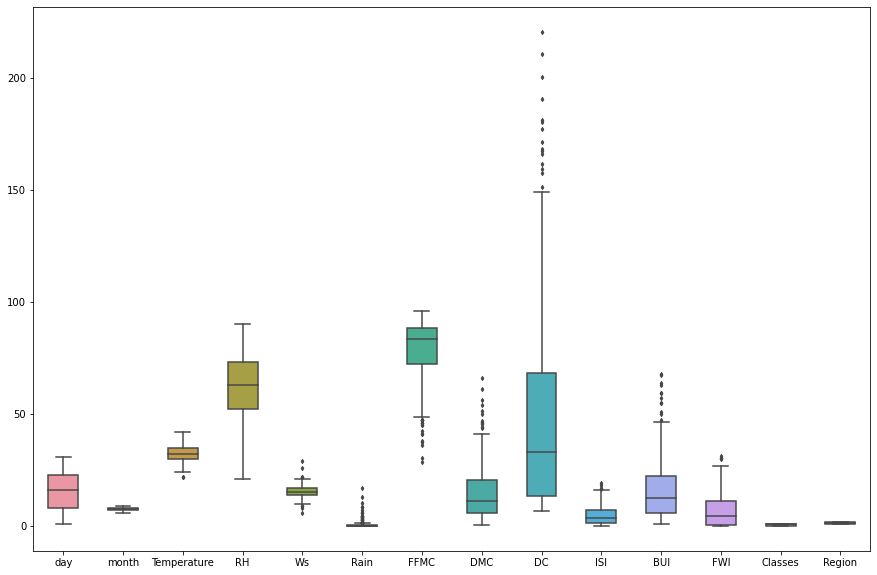

In [104]:
fig, ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=df,width=0.5,ax=ax,fliersize=3)

In [102]:
# These columns have outliers and needs treating
# 'Ws', 'Rain', 'FFMC', 'DMC', 'DC','ISI', 'BUI', 'FWI'

In [105]:

#Treating outliers 
kit=['Ws', 'Rain', 'FFMC', 'DMC', 'DC','ISI', 'BUI', 'FWI']
i=0
for i in kit:
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    print(f'\nOutlier check for the data column:  {i}')
    print(f'\nQ1 value={Q1}\nQ3 value={Q3}\nIQR value = {IQR}')
    Lower_Fence=Q1-1.5*IQR
    Upper_Fence=Q3+1.5*IQR
    print(f'\nLower Fence ={Lower_Fence} and Upper Fence ={Upper_Fence}')
    u_outbound=df[i][df[i]>Upper_Fence].count()
    l_outbound=df[i][df[i]<Lower_Fence].count()
    per_l=stats.percentileofscore(df[i],Lower_Fence)
    per_u=stats.percentileofscore(df[i],Upper_Fence)
    print(f'\nNumber of data point outside Upper Fence: {u_outbound}')
    print(f'\nNumber of data point outside Lower Fence: {l_outbound}')
    print(f'\nPercentile of Upper Fence Datapoint: {per_u}')  
    print(f'\nPercentile of Lower Fence Datapoint: {per_l}') 
    print('____________________________________________________________________________________________________')



Outlier check for the data column:  Ws

Q1 value=14.0
Q3 value=17.0
IQR value = 3.0

Lower Fence =9.5 and Upper Fence =21.5

Number of data point outside Upper Fence: 4

Number of data point outside Lower Fence: 4

Percentile of Upper Fence Datapoint: 98.36065573770492

Percentile of Lower Fence Datapoint: 1.639344262295082
____________________________________________________________________________________________________

Outlier check for the data column:  Rain

Q1 value=0.0
Q3 value=0.5
IQR value = 0.5

Lower Fence =-0.75 and Upper Fence =1.25

Number of data point outside Upper Fence: 35

Number of data point outside Lower Fence: 0

Percentile of Upper Fence Datapoint: 85.65573770491804

Percentile of Lower Fence Datapoint: 0.0
____________________________________________________________________________________________________

Outlier check for the data column:  FFMC

Q1 value=72.075
Q3 value=88.3
IQR value = 16.224999999999994

Lower Fence =47.73750000000001 and Upper Fence =11

# Data Cleaning by deleting outliers

In [111]:
q=df['Ws'].quantile(.983)
df_c=df[df['Ws']<q]
q=df['Rain'].quantile(.95)
df_c=df[df['Ws']<q]
q=df['FFMC'].quantile(.065)
df_c=df[df['FFMC']>q]
q=df['DMC'].quantile(.95)
df_c=df[df['DMC']<q]
q=df['DC'].quantile(.935)
df_c=df[df['DC']<q]
q=df['ISI'].quantile(.983)
df_c=df[df['ISI']<q]
q=df['BUI'].quantile(.95)
df_c=df[df['BUI']<q]
q=df['FWI'].quantile(.983)
df_c=df[df['FWI']<q]

In [112]:
df_c

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,2
242,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,2
243,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,2
244,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,2


In [114]:
df.shape

(244, 14)

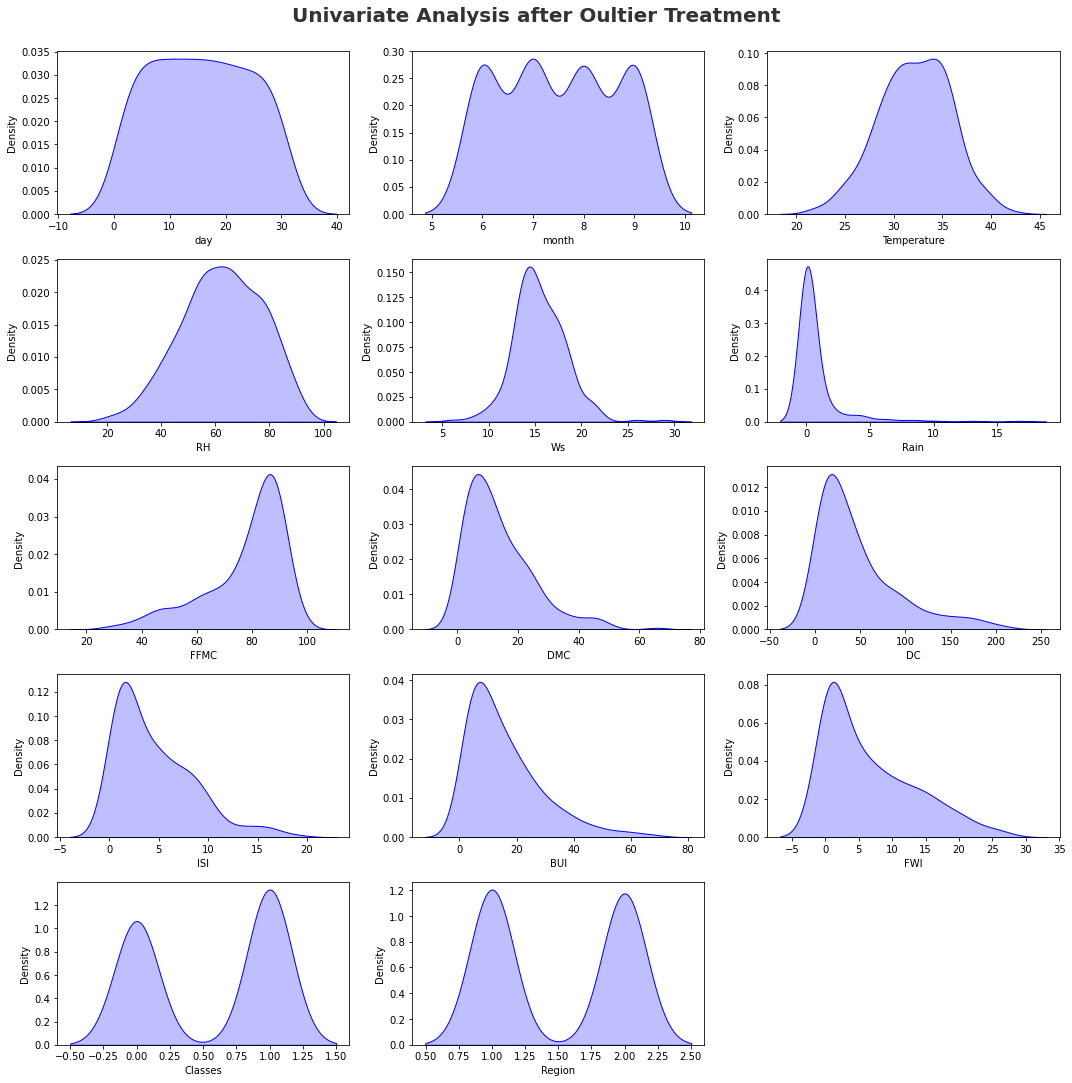

In [117]:
#kde plot for all the variable(numeric) after Outlier treatment
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis after Oultier Treatment', fontsize=20,fontweight='bold',alpha=0.8,y=1)

for i in range(0,len(df_c.columns)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df_c[df_c.columns[i]],shade=True,color='b')
    plt.xlabel(df_c.columns[i])
    plt.tight_layout()

<AxesSubplot:>

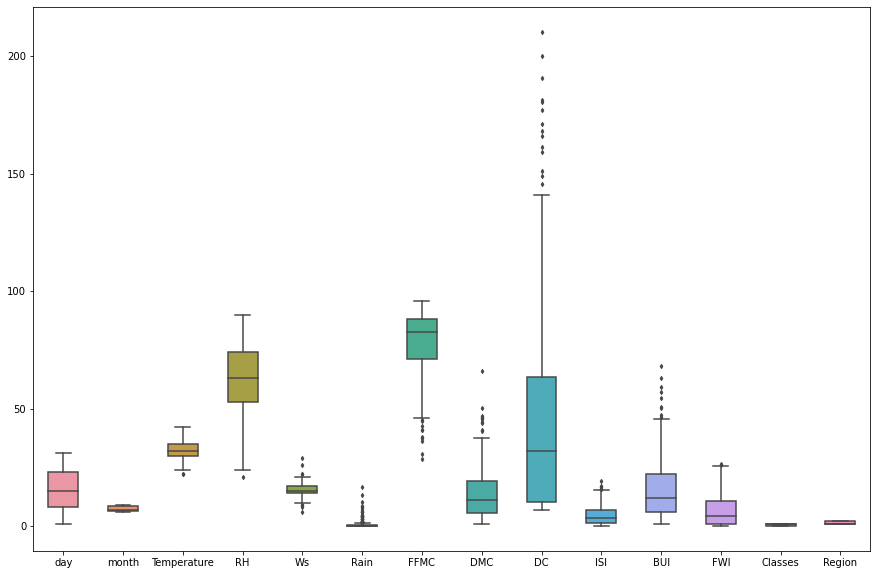

In [118]:
fig, ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=df_c,width=0.5,ax=ax,fliersize=3)

In [119]:
X=df_c.drop(columns=['Classes'])
y=df_c['Classes']

In [120]:
X

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,2
242,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,2
243,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,2
244,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,2


In [121]:
y

0      0
1      0
2      0
3      0
4      0
      ..
241    1
242    0
243    0
244    0
245    0
Name: Classes, Length: 239, dtype: int32

C:\Users\shara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\shara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\shara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\shara\anacond

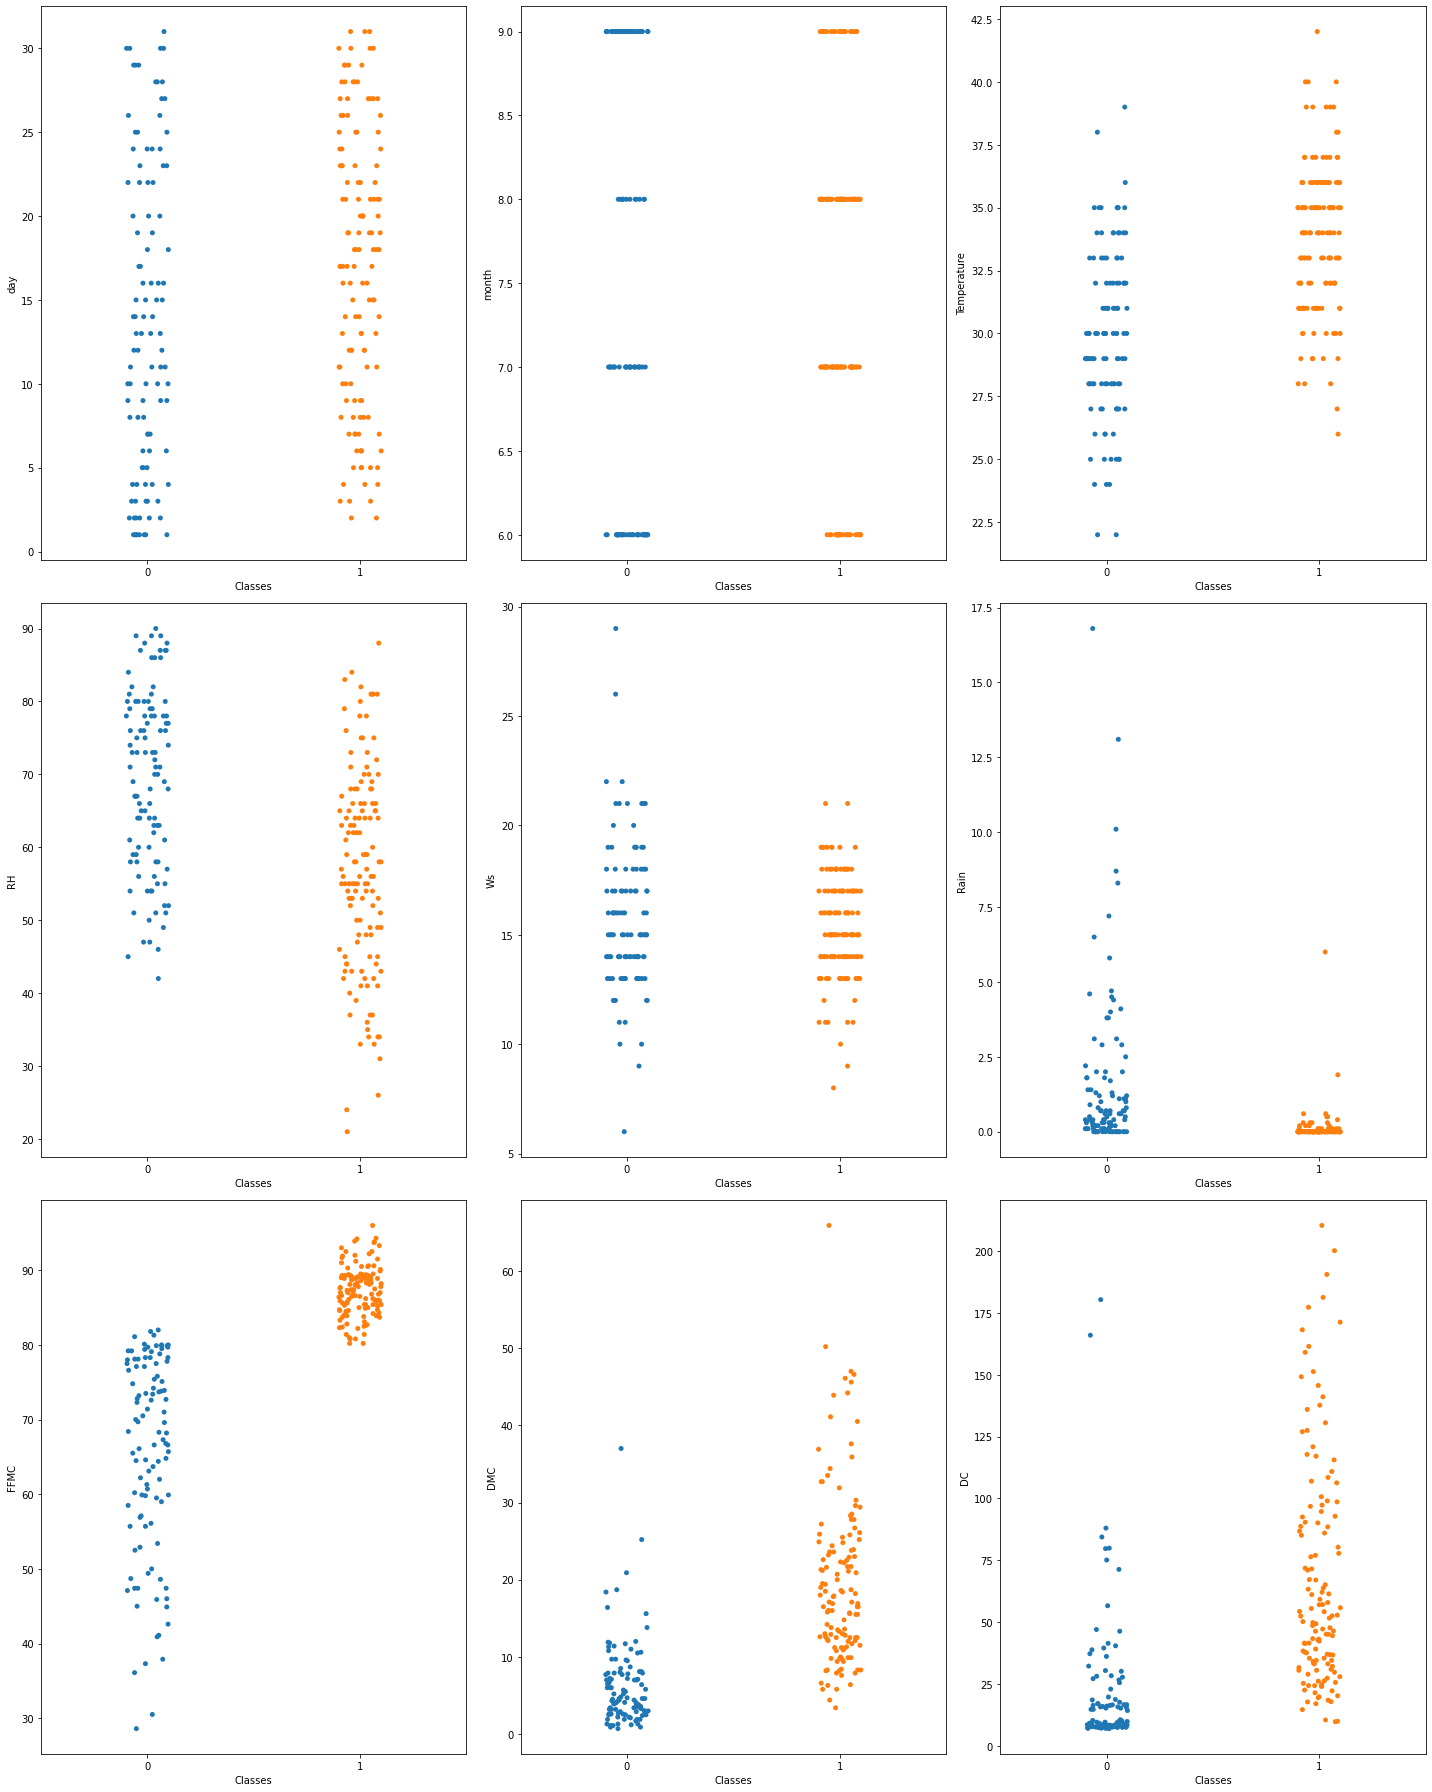

In [122]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for i in X:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[i])
    plotnumber+=1
plt.tight_layout()

In [124]:
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)

In [125]:
X_scaled

array([[-1.65700872, -1.33381774, -0.85658786, ..., -0.95818614,
        -0.9046277 , -0.9875255 ],
       [-1.54320841, -1.33381774, -0.85658786, ..., -0.91963805,
        -0.91951792, -0.9875255 ],
       [-1.4294081 , -1.33381774, -1.67987672, ..., -1.01215347,
        -0.96418859, -0.9875255 ],
       ...,
       [ 1.41559969,  1.34502629, -1.4054471 , ..., -0.95818614,
        -0.94929836,  1.01263208],
       [ 1.52940001,  1.34502629, -2.22873597, ..., -0.82712264,
        -0.87484726,  1.01263208],
       [ 1.64320032,  1.34502629, -2.22873597, ..., -0.85025149,
        -0.9046277 ,  1.01263208]])

In [126]:
X_train, X_test, y_train, y_test = train_test_split( X_scaled, y, test_size=0.25, random_state=42)

In [127]:
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [128]:
y_pred=log_reg.predict(X_test)

In [129]:
y_pred

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0])

# Performance Matrices

In [132]:
#Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[26,  1],
       [ 0, 33]], dtype=int64)

In [133]:
TP=cm[0][0]
FP=cm[0][1]
FN=cm[1][0]
TN=cm[1][1]

In [135]:
TP,FP,FN,TN

(26, 1, 0, 33)

In [136]:
accuracy_score(y_test,y_pred)

0.9833333333333333

In [138]:
Precision=TP/(TP+FP)
Precision

0.9629629629629629

In [140]:
Recall=TP/(TP+FN)
Recall

1.0

In [141]:
F1_score=2*(Precision*Recall)/(Precision+Recall)
F1_score

0.9811320754716981